In [1]:
import random, collections
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from tqdm import tqdm

In [2]:
DATA_DIR     = Path('data/speech_commands_v0.01').expanduser()
KNOWN        = ["yes","no","up","down","left","right","on","off","stop","go"]

BATCH_SIZE   = 128
SEED         = 42

In [3]:
from helpers.speech_datasets import (
    get_task1_dataloaders,
    get_task2_dataloaders,
    get_task3_dataloaders,
    get_task4_dataloaders,
)

def dl_to_counts(loader, id2label):
    """Return Counter(label → count) for the *entire* dataset behind DataLoader."""
    # each loader.dataset is a TensorDataset(X, y)
    y = loader.dataset.tensors[1].numpy()
    return collections.Counter(id2label[i] for i in y)

def summarise_task(name, loaders, id2label):
    """Return a DataFrame with columns: task | split | label | count"""
    rows = []
    for split, dl in zip(["train", "val", "test"], loaders):
        cnt = dl_to_counts(dl, id2label)
        for lbl, c in cnt.items():
            rows.append(dict(task=name, split=split, label=lbl, count=c))
    return pd.DataFrame(rows)


def plot_distribution(task_df):
    label_order = sorted(task_df["label"].unique())        # consistent x-axis

    fig, axes = plt.subplots(3, 1,
                            figsize=(max(6, 0.6*len(label_order)), 9),
                            sharex=True)

    for ax, split in zip(axes, ["train", "val", "test"]):
        sns.barplot(
            data=task_df[task_df["split"] == split],
            x="label", y="count",
            order=label_order,
            ax=ax
        )
        ax.set_title(f"{split}")
        ax.set_ylabel("samples")
        ax.grid(axis="y", alpha=0.4)
        for t in ax.get_xticklabels():
            t.set_rotation(45)

    axes[-1].set_xlabel("label")
    fig.tight_layout()
    plt.show()

loading train:   0%|          | 0/51088 [00:00<?, ?it/s]

loading val:   0%|          | 0/6798 [00:00<?, ?it/s]

loading test:   0%|          | 0/6835 [00:00<?, ?it/s]

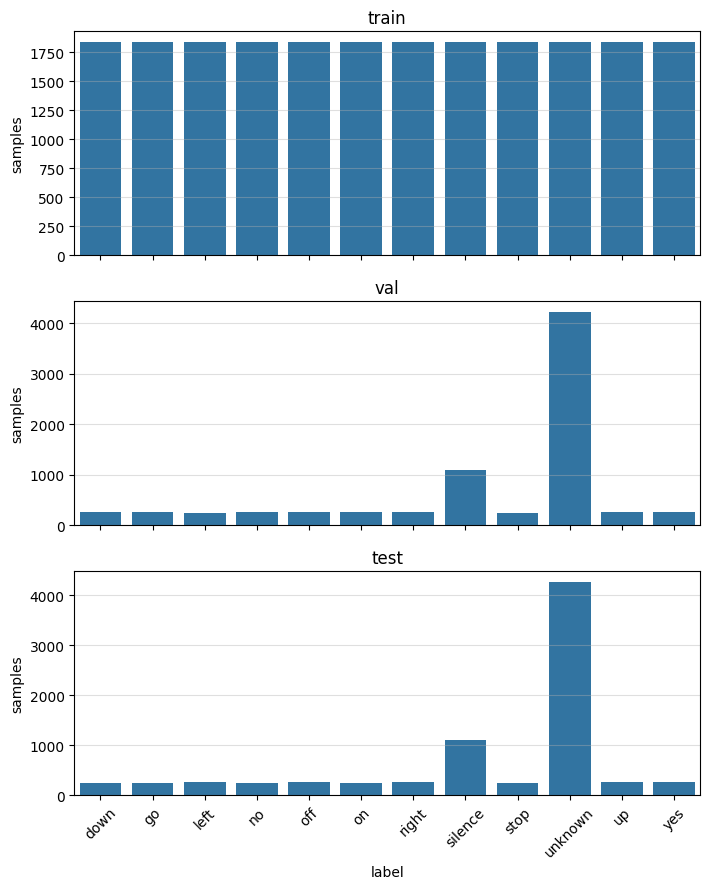

In [4]:
# ---- Task 1 ----
t1 = get_task1_dataloaders(
    data_dir=DATA_DIR,
    known_commands=KNOWN,
    batch_size=BATCH_SIZE,
    seed=SEED,
)
t1_df = summarise_task("Task 1", t1[:3], {v: k for k, v in t1[3].items()})
plot_distribution(t1_df)

loading train:   0%|          | 0/51088 [00:00<?, ?it/s]

loading val:   0%|          | 0/6798 [00:00<?, ?it/s]

loading test:   0%|          | 0/6835 [00:00<?, ?it/s]

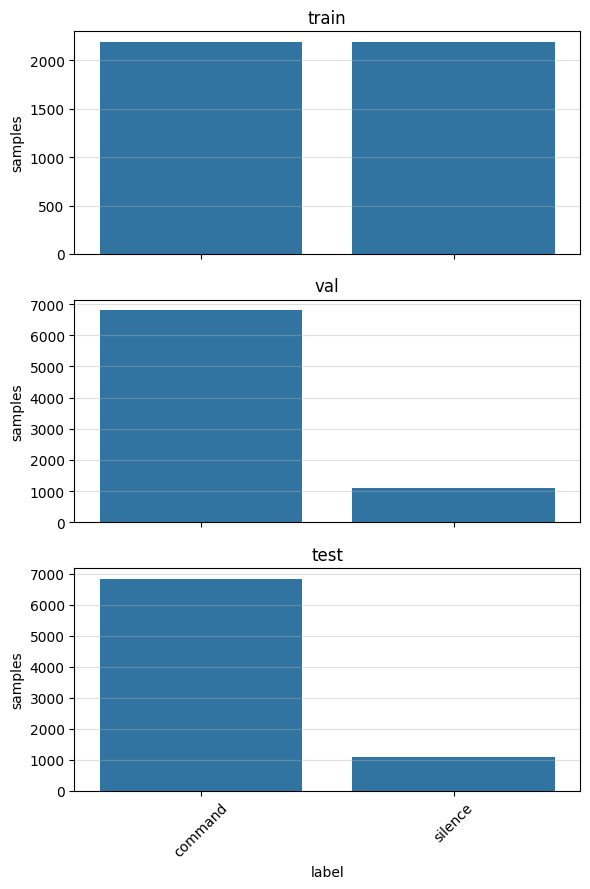

In [5]:
# ---- Task 2 ----
t2 = get_task2_dataloaders(
    data_dir=DATA_DIR,
    batch_size=BATCH_SIZE,
    seed=SEED,
)
t2_df = summarise_task("Task 2", t2[:3], {v: k for k, v in t2[3].items()})
plot_distribution(t2_df)

loading train:   0%|          | 0/51088 [00:00<?, ?it/s]

loading val:   0%|          | 0/6798 [00:00<?, ?it/s]

loading test:   0%|          | 0/6835 [00:00<?, ?it/s]

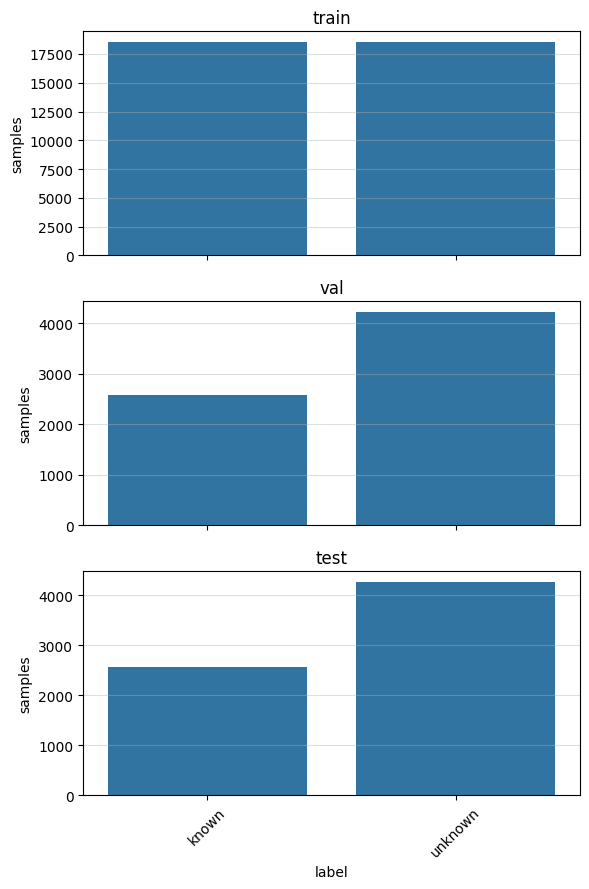

In [6]:
# ---- Task 3 ----
t3 = get_task3_dataloaders(
    data_dir=DATA_DIR,
    known_commands=KNOWN,
    batch_size=BATCH_SIZE,
    seed=SEED,
)
t3_df = summarise_task("Task 3", t3[:3], {v: k for k, v in t3[3].items()})
plot_distribution(t3_df)

loading train:   0%|          | 0/18538 [00:00<?, ?it/s]

loading val:   0%|          | 0/2577 [00:00<?, ?it/s]

loading test:   0%|          | 0/2567 [00:00<?, ?it/s]

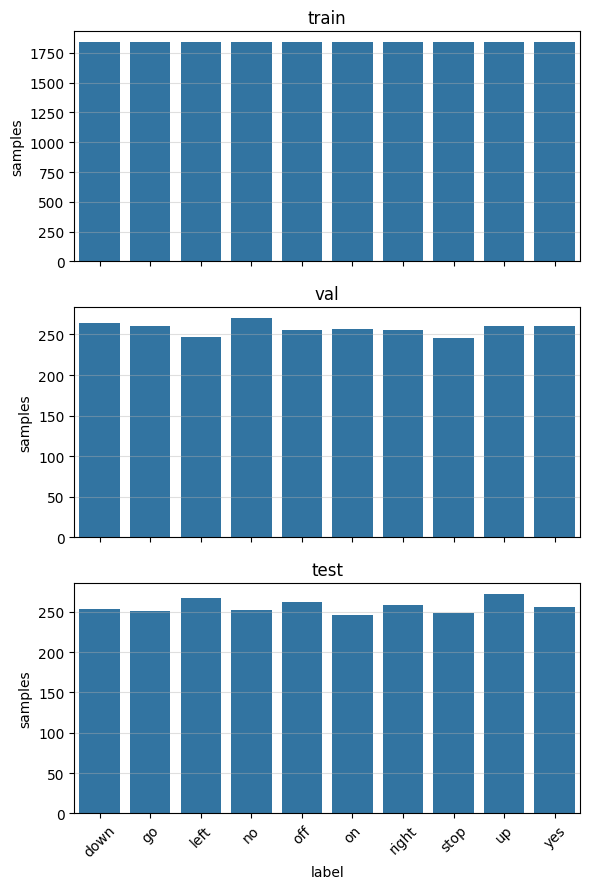

In [7]:
# ---- Task 4 ----
t4 = get_task4_dataloaders(
    data_dir=DATA_DIR,
    known_commands=KNOWN,
    batch_size=BATCH_SIZE,
    seed=SEED,
)
t4_df = summarise_task("Task 4", t4[:3], {v: k for k, v in t4[3].items()})
plot_distribution(t4_df)